In [42]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
from astropy.visualization import ImageNormalize, LinearStretch
from astropy.wcs import WCS
from astropy import units as u

In [43]:
dic='/Users/shiwuzhang/WS/ASTRO/MAMMOTH_KCWI/'
hst_fits=fits.open(dic+'HST_MAMMOTH_trim.fits')
img=np.around(hst_fits[0].data,decimals=8)
wcs=WCS(hst_fits[0].header)
norm=ImageNormalize(vmax=0.1,vmin=-1e-3,stretch=LinearStretch())


ly_fits=fits.open(dic+'ly.fits')
heii_fits=fits.open(dic+'heii.fits')
civ_fits=fits.open(dic+'civ.fits')
lycontourwcs=WCS(ly_fits[0].header)
lycontourwcs=lycontourwcs.dropaxis(2)
heiicontourwcs=WCS(heii_fits[0].header)
heiicontourwcs=heiicontourwcs.dropaxis(2)
civcontourwcs=WCS(civ_fits[0].header)
civcontourwcs=civcontourwcs.dropaxis(2)
halphacontourwcs=WCS(H_alpha_fits[0].header)
contourwcs=[lycontourwcs,heiicontourwcs,civcontourwcs]
fits_file=[ly_fits,heii_fits,civ_fits]
Levels=[[5,9,18,30,42,51],[3,5,9],[3.8,7,9]]
linewid=[1.1,1.3,1.3]

In [44]:
sourceb=np.array([[85,210],[83.5,228],[88,183]])
gsources=np.array([[42,305],[32,183],[182,258],[189,112],[210,185]])
name=['G-1','G-3','G-5','G-4','G-6']

/usr/local/lib/python3.7/site-packages/matplotlib/contour.py:1000: UserWarning: The following kwargs were not used by contour: 'label'
  s)


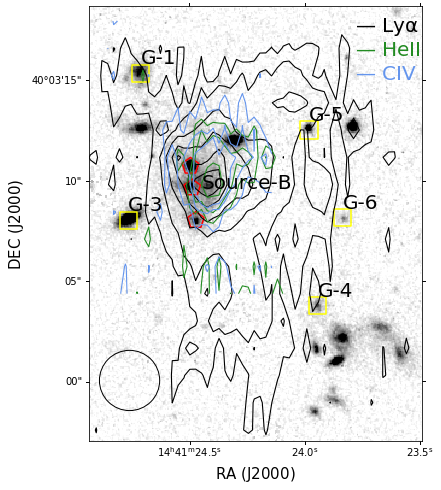

In [45]:
dic='/Users/shiwuzhang/WS/ASTRO/MAMMOTH_KCWI/draft_code/paper/ApJtemplate/figs/'
ax=plt.subplot(projection=wcs)
ax.imshow(img,norm=norm,cmap='gray_r')
color=['black','forestgreen','cornflowerblue','darkred']
label=[r'Ly$\alpha$','HeII','CIV',r'H$\alpha$']
for i in range(3):
    ax.contour(fits_file[i][0].data,transform=ax.get_transform(contourwcs[i]),
               levels=Levels[i],colors=color[i],linewidths=1.1,label=label[i])
for i in range(3):
    ax.scatter(*sourceb[i],transform=ax.get_transform(wcs),
               color='red',marker='p',facecolors='none',s=300,linewidths=1.5)
for i in range(5):
    ax.scatter(*gsources[i],transform=ax.get_transform(wcs),
               color='yellow',marker='s',facecolors='none',s=300,linewidths=1.5)
    ax.text(*gsources[i]+np.array([0,8]),name[i],color='black',fontsize=20)
for i in [0]:
    ax.text(*sourceb[i]+np.array([8,0]),'Source-B',
            color='black',fontsize=20)
circle=plt.Circle((33,50),25,
                  edgecolor='black', facecolor='none',
                  transform=ax.get_transform(wcs))
ax.add_patch(circle)
ax.text(220,340,r'— $\rm Ly\alpha$',color='black',
        transform=ax.get_transform(wcs),fontsize=20)
ax.text(220,320,r'— $\rm HeII$',color='forestgreen',
        transform=ax.get_transform(wcs),fontsize=20)
ax.text(220,300,r'— $\rm CIV$',color='cornflowerblue',
        transform=ax.get_transform(wcs),fontsize=20)
ax.set_xlabel(r'$\rm RA \ (J2000)$',fontsize=15)
ax.set_ylabel(r'$\rmDEC \ (J2000)$',fontsize=15)
plt.rcParams['figure.figsize'] = [8, 8]
plt.show()
# plt.savefig(dic+'contour.png',dpi=300)